# Imports and Helper functions


In [1]:
# Import libraries
import gym
import torch
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
plt.style.use('ggplot')


In [2]:
# Create enviornment
env = gym.make('FrozenLake-v0')

In [3]:
# check the states 
state_space = env.observation_space.n

In [5]:
# check action space
action_space = env.action_space.n

In [6]:
# define hyperparameters
num_episode = 1000
gamma = 0.99
learning_rate = 0.9

In [15]:
steps_total = []
total_reward = []

Q = torch.zeros([state_space, action_space])

for i_episode in range(num_episode):
    state = env.reset()
    step = 0
    
    while True:
        step += 1

        random_values = Q[state] + torch.rand(1, action_space)/1000  # add some randomness to the current Q state value 
        action = torch.max(random_values, 1)[1].item() # get the action from the max value state
        
        new_state, reward, done, info = env.step(action)

        # Update Q table using bellman equation
        Q[state][action] = (1 - learning_rate) * Q[state][action] + \
                        learning_rate * (reward + gamma * torch.max(Q[new_state]))

        state = new_state

        #env.render()
        if done:
            steps_total.append(step)
            total_reward.append(reward)
            #print('episode finished after %i steps' %step)
            break

print(Q)

tensor([[3.7741e-01, 9.5659e-04, 1.1039e-04, 4.2838e-04],
        [5.0944e-07, 4.6220e-05, 1.1293e-05, 6.7401e-01],
        [5.8483e-01, 5.1875e-05, 6.3661e-05, 0.0000e+00],
        [6.9562e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [3.5815e-01, 0.0000e+00, 4.2501e-04, 5.5106e-06],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [4.8195e-02, 2.0610e-07, 5.6422e-05, 3.0907e-08],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 6.9599e-04, 2.8381e-04, 4.0188e-01],
        [0.0000e+00, 8.0577e-01, 7.1449e-06, 0.0000e+00],
        [7.5800e-01, 8.9728e-05, 2.4023e-04, 4.5975e-05],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 9.2839e-01, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 9.7596e-01, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]])


In [16]:
print('Percent of episodes finished successfully : {0}'.format(sum(total_reward)/num_episode))
print('Percent of episodes finished successfully (last 100 episodes) : {0}'.format(sum(total_reward[-100:])/100))
print('Average number of steps: %.2f' % (sum(steps_total)/num_episode))
print('Average number of steps (last 100 episodes): %.2f' % (sum(steps_total[-100:])/100))

Percent of episodes finished successfully : 0.526
Percent of episodes finished successfully (last 100 episodes) : 0.7
Average number of steps: 33.66
Average number of steps (last 100 episodes): 42.29


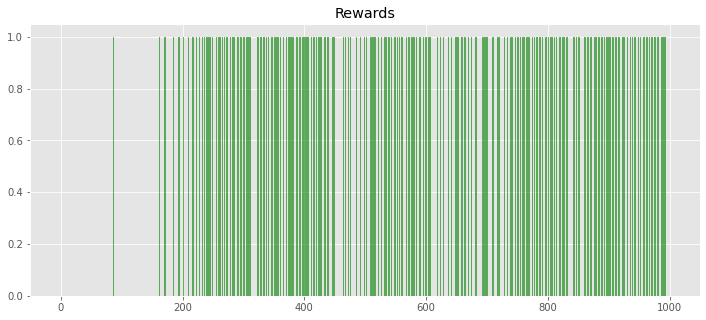

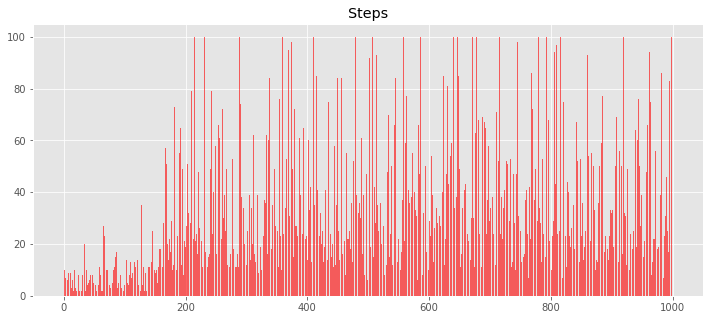

In [17]:
# Plot graphs for rewards and steps
plt.figure(figsize = (12, 5))
plt.title('Rewards')
plt.bar(torch.arange(len(total_reward)), total_reward, alpha = 0.6, color = 'green')
plt.show()

plt.figure(figsize = (12, 5))
plt.title('Steps')
plt.bar(torch.arange(len(steps_total)), steps_total, alpha = 0.6, color = 'red')
plt.show()